In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
train_path='train.csv'
test_path="test.csv"
train_df=pd.read_csv(train_path,index_col='Id')
test_df=pd.read_csv(test_path,index_col='Id')

In [159]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [161]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 

In [162]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [163]:
test_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Filling in missing values

iterpolate() will fill in missing values with the mean value. It is make sure that the standard deviation is not affected by missing values.

In [164]:
train_df.interpolate(inplace=True)
test_df.interpolate(inplace=True)

In [165]:
#train_df=pd.get_dummies(train_df)
#test_df=pd.get_dummies(test_df)

In [166]:
#v=(train_df['MSSubClass'].isnull().sum())
#print(v)
for col in (train_df.columns):
    v = train_df[col].isnull().sum()
    if v>0:
        print(col, "  ", v)
    

Alley    1369
MasVnrType    8
BsmtQual    37
BsmtCond    37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical    1
FireplaceQu    690
GarageType    81
GarageFinish    81
GarageQual    81
GarageCond    81
PoolQC    1453
Fence    1179
MiscFeature    1406


In [167]:
for col in (test_df.columns):
    v = test_df[col].isnull().sum()
    if v>0:
        print(col, "  ", v)

MSZoning    4
Alley    1352
Utilities    2
Exterior1st    1
Exterior2nd    1
MasVnrType    16
BsmtQual    44
BsmtCond    45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual    1
Functional    2
FireplaceQu    730
GarageType    76
GarageFinish    78
GarageQual    78
GarageCond    78
PoolQC    1456
Fence    1169
MiscFeature    1408
SaleType    1


## 1.1 MSZoning 

In [168]:
test_df['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [169]:
train_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [170]:
test_df[[ 'MSZoning_C (all)',  'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 
         'MSZoning_RM']] = pd.get_dummies(test_df['MSZoning'], dummy_na=False)
test_df.drop('MSZoning', axis=1, inplace=True)


In [263]:

train_df[[ 'MSZoning_C (all)',  'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 
          'MSZoning_RM']] = pd.get_dummies(train_df['MSZoning'], dummy_na=False)
train_df.drop('MSZoning', axis=1, inplace=True)

## 1.2 Alley

In [171]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [172]:
test_df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

As only 3 values are there, we will use get dummies to turn them into classification, that way we will successfully handle the NAN. We will run it for both test and train data

If dummy_na is set True, the column is automatically dropped

In [173]:
train_df[['Alley_Grvl', 'Alley_Pave', 'NoAlley']]=pd.get_dummies(train_df['Alley'], dummy_na=True)
test_df[['Alley_Grvl', 'Alley_Pave', 'NoAlley']]=pd.get_dummies(test_df['Alley'], dummy_na=True)

In [174]:
train_df.drop('Alley', axis=1, inplace=True)
test_df.drop('Alley', axis=1, inplace=True)

## 1.3 MasVnrType

**MasVnrType** had 4 categories out of which one is None. So we filled in missing values with none and considered the data as not available because it does not exists. Also this data is categorical, so we will use get dummies on this too later.

In [175]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [176]:
test_df['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [177]:
for dataset in [train_df, test_df]:
    dataset['MasVnrType'].fillna(value='None', inplace=True)
    dataset[['MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_NoMasVnr','MasVnrType_Stone',
             'No_masvnr']] = pd.get_dummies(dataset['MasVnrType'], dummy_na=True)

In [178]:
for dataset in [train_df, test_df]:
    dataset.drop(labels=['MasVnrType'], axis=1, inplace=True)

## 1.4 Utilities

In [179]:
train_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [180]:
test_df['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [181]:
train_df[['Utilities_AllPub', 'Utilities_NoSeWa']]=pd.get_dummies(train_df['Utilities'], dummy_na=False)
test_df[['Utilities_AllPub']]=pd.get_dummies(test_df['Utilities'], dummy_na=False)

In [182]:
train_df.drop(['Utilities'], axis=1, inplace=True)
test_df.drop(['Utilities'], axis=1, inplace=True)

## 1.5 Exterior1st, Exterior2nd

In [183]:
for dataset in [train_df, test_df]:
    #print('null values', dataset['Exterior1st'].isnull().sum())
    print(dataset['Exterior1st'].unique())
    print(dataset['Exterior2nd'].unique())

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']


In [184]:
pd.get_dummies(train_df['Exterior1st']).columns

Index(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
       'VinylSd', 'Wd Sdng', 'WdShing'],
      dtype='object')

In [185]:
pd.get_dummies(test_df['Exterior1st'], dummy_na=True).head()

,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,nan
Id,,,,,,,,,,,,,,
1461,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1462,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1463,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1464,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1465,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [186]:
train_df[['Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 
          'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 
          'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 
          'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng']] = pd.get_dummies(train_df['Exterior2nd'])

In [187]:
train_df[['Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_Brk Cmn', 'Exterior1st_BrkFace', 
          'Exterior1st_CBlock', 'Exterior1st_CmentBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 
          'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 
          'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Wd Shng']] = pd.get_dummies(train_df['Exterior1st'])

In [188]:
test_df[['Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_Brk Cmn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
         'Exterior1st_CmentBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',  'Exterior1st_Plywood', 'Exterior1st_Stucco', 
         'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_Wd Shng']] = pd.get_dummies(test_df['Exterior1st'])

In [189]:
test_df[['Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
         'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior1st_ImStucc', 'Exterior2nd_MetalSd',  'Exterior2nd_Plywood', 
         'Exterior1st_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng']] = pd.get_dummies(test_df['Exterior2nd'])

In [190]:
for dataset in [train_df, test_df]:
    dataset.drop(labels=['Exterior2nd'], axis=1, inplace=True)
    dataset.drop(labels=['Exterior1st'], axis=1, inplace=True)

## 1.6 BsmtQual
We will consider basement as non existant for nan values
For this we will call get dummies on the dataset for basement quality column.

In [191]:
for dataset in [train_df, test_df]:
    print('null values', dataset['BsmtQual'].isnull().sum())
    print(dataset['BsmtQual'].unique())
    print(dataset['BsmtQual'].value_counts())

pd.get_dummies(dataset['BsmtQual'], dummy_na=True).head()

for dataset in [train_df, test_df]:
    dataset[['BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
             'NoBsmt']] = pd.get_dummies(dataset['BsmtQual'], dummy_na=True)
    dataset.drop(labels=['BsmtQual'], axis=1, inplace=True)

null values 37
['Gd' 'TA' 'Ex' nan 'Fa']
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
null values 44
['TA' 'Gd' 'Ex' 'Fa' nan]
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


## 1.7 BsmtCond

In [192]:
for dataset in [train_df, test_df]:
    print('null values', dataset['BsmtCond'].isnull().sum())
    print(dataset['BsmtCond'].unique())
    print(dataset['BsmtCond'].value_counts())

for dataset in [train_df, test_df]:
    dataset[['BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA']] = pd.get_dummies(dataset['BsmtCond'])
    dataset.drop(labels=['BsmtCond'], axis=1, inplace=True)

null values 37
['TA' 'Gd' nan 'Fa' 'Po']
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
null values 45
['TA' 'Po' 'Fa' 'Gd' nan]
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


## 1.8 BsmtExposure

In [193]:
for dataset in [train_df, test_df]:
    print('null values', dataset['BsmtExposure'].isnull().sum())
    print(dataset['BsmtExposure'].unique())

print(pd.get_dummies(dataset['BsmtExposure'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 
             'No_BsmtExposure']] = pd.get_dummies(dataset['BsmtExposure'])
    dataset.drop(labels=['BsmtExposure'], axis=1, inplace=True)

null values 38
['No' 'Gd' 'Mn' 'Av' nan]
null values 44
['No' 'Gd' 'Mn' 'Av' nan]
      Av  Gd  Mn  No  NaN
Id                       
1461   0   0   0   1    0
1462   0   0   0   1    0
1463   0   0   0   1    0
1464   0   0   0   1    0
1465   0   0   0   1    0


## 1.9 BsmtFinType1, BsmtFinType2

In [194]:
for dataset in [train_df, test_df]:
    print('null values', dataset['BsmtFinType1'].isnull().sum())
    print(dataset['BsmtFinType1'].unique())

print(pd.get_dummies(dataset['BsmtFinType1'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ','BsmtFinType2_Rec',
             'BsmtFinType2_Unf']] = pd.get_dummies(dataset['BsmtFinType2'])
    dataset.drop(labels=['BsmtFinType2'], axis=1, inplace=True)
    
    dataset[['BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ','BsmtFinType1_Rec',
             'BsmtFinType1_Unf']] = pd.get_dummies(dataset['BsmtFinType1'])
    dataset.drop(labels=['BsmtFinType1'], axis=1, inplace=True)

null values 37
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
null values 42
['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
      ALQ  BLQ  GLQ  LwQ  Rec  Unf  NaN
Id                                     
1461    0    0    0    0    1    0    0
1462    1    0    0    0    0    0    0
1463    0    0    1    0    0    0    0
1464    0    0    1    0    0    0    0
1465    1    0    0    0    0    0    0


## 1.10 KitchenQual

In [195]:
for dataset in [train_df, test_df]:
    print('null values', dataset['KitchenQual'].isnull().sum())
    print(dataset['KitchenQual'].unique())

print(pd.get_dummies(dataset['KitchenQual'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['KitchenQual_Ex','KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA']] = pd.get_dummies(dataset['KitchenQual'])
    dataset.drop(labels=['KitchenQual'], axis=1, inplace=True)

null values 0
['Gd' 'TA' 'Ex' 'Fa']
null values 1
['TA' 'Gd' 'Ex' 'Fa' nan]
      Ex  Fa  Gd  TA  NaN
Id                       
1461   0   0   0   1    0
1462   0   0   1   0    0
1463   0   0   0   1    0
1464   0   0   1   0    0
1465   0   0   1   0    0


## 1.11 Functional, Electrical

In [253]:
for dataset in [train_df, test_df]:
    print('null values', dataset['Functional'].isnull().sum())
    print(dataset['Functional'].unique())

print(pd.get_dummies(dataset['Functional'], dummy_na=True).head())



for dataset in [train_df, test_df]:
    #print(dataset['Functional'][dataset['Functional'].isnull()]='Typ')
    dataset['Functional'][dataset['Functional'].isnull()]='Typ'
    dataset[['Functional_Maj1',  'Functional_Maj2',  'Functional_Min1',  'Functional_Min2',
             'Functional_Mod',  'Functional_Sev',  'Functional_Typ']] = pd.get_dummies(dataset['Functional'])
    dataset.drop(labels=['Functional'], axis=1, inplace=True)
    pass

null values 0
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
null values 0
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2']
      Maj1  Maj2  Min1  Min2  Mod  Sev  Typ  NaN
Id                                              
1461     0     0     0     0    0    0    1    0
1462     0     0     0     0    0    0    1    0
1463     0     0     0     0    0    0    1    0
1464     0     0     0     0    0    0    1    0
1465     0     0     0     0    0    0    1    0


C:\Users\RachnaGupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [197]:
#v=(train_df['MSSubClass'].isnull().sum())
#print(v)
for col in (train_df.columns):
    v = train_df[col].isnull().sum()
    if v>0:
        print(col, "  ", v)
    

Electrical    1
FireplaceQu    690
GarageType    81
GarageFinish    81
GarageQual    81
GarageCond    81
PoolQC    1453
Fence    1179
MiscFeature    1406


In [198]:
for dataset in [train_df, test_df]:
    print('null values', dataset['Electrical'].isnull().sum())
    print(dataset['Electrical'].unique())

print(pd.get_dummies(train_df['Electrical'], dummy_na=True).head())

print(pd.get_dummies(test_df['Electrical'], dummy_na=True).head())

train_df[['Electrical_FuseA','Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 
             'Electrical_SBrkr']] = pd.get_dummies(train_df['Electrical'])
test_df[['Electrical_FuseA','Electrical_FuseF', 'Electrical_FuseP',
             'Electrical_SBrkr']] = pd.get_dummies(test_df['Electrical'])

for dataset in [train_df, test_df]:
    dataset.drop(labels=['Electrical'], axis=1, inplace=True)

null values 1
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
null values 0
['SBrkr' 'FuseA' 'FuseF' 'FuseP']
    FuseA  FuseF  FuseP  Mix  SBrkr  NaN
Id                                      
1       0      0      0    0      1    0
2       0      0      0    0      1    0
3       0      0      0    0      1    0
4       0      0      0    0      1    0
5       0      0      0    0      1    0
      FuseA  FuseF  FuseP  SBrkr  NaN
Id                                   
1461      0      0      0      1    0
1462      0      0      0      1    0
1463      0      0      0      1    0
1464      0      0      0      1    0
1465      0      0      0      1    0


## 1.12 FireplaceQu

In [199]:
for dataset in [train_df, test_df]:
    print('null values', dataset['FireplaceQu'].isnull().sum())
    print(dataset['FireplaceQu'].unique())

print(pd.get_dummies(train_df['FireplaceQu'], dummy_na=True).head())
print(pd.get_dummies(test_df['FireplaceQu'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['FireplaceQu_Ex',  'FireplaceQu_Fa',  'FireplaceQu_Gd',  'FireplaceQu_Po',
             'FireplaceQu_TA',  'FireplaceQu_No']] = pd.get_dummies(dataset['FireplaceQu'], dummy_na=True)
    dataset.drop(labels=['FireplaceQu'], axis=1, inplace=True)

null values 690
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
null values 730
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
    Ex  Fa  Gd  Po  TA  NaN
Id                         
1    0   0   0   0   0    1
2    0   0   0   0   1    0
3    0   0   0   0   1    0
4    0   0   1   0   0    0
5    0   0   0   0   1    0
      Ex  Fa  Gd  Po  TA  NaN
Id                           
1461   0   0   0   0   0    1
1462   0   0   0   0   0    1
1463   0   0   0   0   1    0
1464   0   0   1   0   0    0
1465   0   0   0   0   0    1


## 1.13 GarageType

In [200]:
for dataset in [train_df, test_df]:
    print('null values', dataset['GarageType'].isnull().sum())
    print(dataset['GarageType'].unique())

print(pd.get_dummies(train_df['GarageType'], dummy_na=True).head())
print(pd.get_dummies(test_df['GarageType'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['GarageType_2Types',  'GarageType_Attchd',  'GarageType_Basment',  'GarageType_BuiltIn',
             'GarageType_CarPort',  'GarageType_Detchd', 'GarageType_No']] = pd.get_dummies(dataset['GarageType'], dummy_na=True)
    dataset.drop(labels=['GarageType'], axis=1, inplace=True)

null values 81
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
null values 76
['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
    2Types  Attchd  Basment  BuiltIn  CarPort  Detchd  NaN
Id                                                        
1        0       1        0        0        0       0    0
2        0       1        0        0        0       0    0
3        0       1        0        0        0       0    0
4        0       0        0        0        0       1    0
5        0       1        0        0        0       0    0
      2Types  Attchd  Basment  BuiltIn  CarPort  Detchd  NaN
Id                                                          
1461       0       1        0        0        0       0    0
1462       0       1        0        0        0       0    0
1463       0       1        0        0        0       0    0
1464       0       1        0        0        0       0    0
1465       0       1        0        0        0       0    0


## 1.14 GarageFinish

In [201]:
for dataset in [train_df, test_df]:
    print('null values', dataset['GarageFinish'].isnull().sum())
    print(dataset['GarageFinish'].unique())

print(pd.get_dummies(train_df['GarageFinish'], dummy_na=True).head())
print(pd.get_dummies(test_df['GarageFinish'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['GarageFinish_Fin',  'GarageFinish_RFn',  'GarageFinish_Unf',  'GarageFinish_No']] = pd.get_dummies(dataset['GarageFinish'], dummy_na=True)
    dataset.drop(labels=['GarageFinish'], axis=1, inplace=True)

null values 81
['RFn' 'Unf' 'Fin' nan]
null values 78
['Unf' 'Fin' 'RFn' nan]
    Fin  RFn  Unf  NaN
Id                    
1     0    1    0    0
2     0    1    0    0
3     0    1    0    0
4     0    0    1    0
5     0    1    0    0
      Fin  RFn  Unf  NaN
Id                      
1461    0    0    1    0
1462    0    0    1    0
1463    1    0    0    0
1464    1    0    0    0
1465    0    1    0    0


## 1.15 GarageQual

In [202]:
for dataset in [train_df, test_df]:
    print('null values', dataset['GarageQual'].isnull().sum())
    print(dataset['GarageQual'].unique())

print(pd.get_dummies(train_df['GarageQual'], dummy_na=True).head())
print(pd.get_dummies(test_df['GarageQual'], dummy_na=True).head())

train_df[['GarageQual_Ex','GarageQual_Fa',  'GarageQual_Gd',  'GarageQual_Po',
          'GarageQual_TA']] = pd.get_dummies(train_df['GarageQual'])
test_df[['GarageQual_Fa',  'GarageQual_Gd',  'GarageQual_Po',
          'GarageQual_TA']] = pd.get_dummies(test_df['GarageQual'])

for dataset in [train_df, test_df]:
    dataset.drop(labels=['GarageQual'], axis=1, inplace=True)

null values 81
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
null values 78
['TA' nan 'Fa' 'Gd' 'Po']
    Ex  Fa  Gd  Po  TA  NaN
Id                         
1    0   0   0   0   1    0
2    0   0   0   0   1    0
3    0   0   0   0   1    0
4    0   0   0   0   1    0
5    0   0   0   0   1    0
      Fa  Gd  Po  TA  NaN
Id                       
1461   0   0   0   1    0
1462   0   0   0   1    0
1463   0   0   0   1    0
1464   0   0   0   1    0
1465   0   0   0   1    0


## 1.16 GarageCond

In [203]:
for dataset in [train_df, test_df]:
    print('null values', dataset['GarageCond'].isnull().sum())
    print(dataset['GarageCond'].unique())

print(pd.get_dummies(train_df['GarageCond'], dummy_na=True).head())
print(pd.get_dummies(test_df['GarageCond'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'GarageCond_No']] = pd.get_dummies(dataset['GarageCond'], dummy_na=True)
    dataset.drop(labels=['GarageCond'], axis=1, inplace=True)

null values 81
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
null values 78
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
    Ex  Fa  Gd  Po  TA  NaN
Id                         
1    0   0   0   0   1    0
2    0   0   0   0   1    0
3    0   0   0   0   1    0
4    0   0   0   0   1    0
5    0   0   0   0   1    0
      Ex  Fa  Gd  Po  TA  NaN
Id                           
1461   0   0   0   0   1    0
1462   0   0   0   0   1    0
1463   0   0   0   0   1    0
1464   0   0   0   0   1    0
1465   0   0   0   0   1    0


## 1.17 PoolQC

In [204]:
for dataset in [train_df, test_df]:
    print('null values', dataset['PoolQC'].isnull().sum())
    print(dataset['PoolQC'].unique())

print(pd.get_dummies(train_df['PoolQC'], dummy_na=True).head())
print(pd.get_dummies(test_df['PoolQC'], dummy_na=True).head())

train_df[['PoolQC_Ex','PoolQC_Fa',  'PoolQC_Gd',  'PoolQC_No']] = pd.get_dummies(train_df['PoolQC'], dummy_na=True)
test_df[['PoolQC_Ex', 'PoolQC_Gd',  'PoolQC_No']] = pd.get_dummies(test_df['PoolQC'], dummy_na=True)

for dataset in [train_df, test_df]:
    dataset.drop(labels=['PoolQC'], axis=1, inplace=True)

null values 1453
[nan 'Ex' 'Fa' 'Gd']
null values 1456
[nan 'Ex' 'Gd']
    Ex  Fa  Gd  NaN
Id                 
1    0   0   0    1
2    0   0   0    1
3    0   0   0    1
4    0   0   0    1
5    0   0   0    1
      Ex  Gd  NaN
Id               
1461   0   0    1
1462   0   0    1
1463   0   0    1
1464   0   0    1
1465   0   0    1


## 1.18 Fence

In [205]:
for dataset in [train_df, test_df]:
    print('null values', dataset['Fence'].isnull().sum())
    print(dataset['Fence'].unique())

print(pd.get_dummies(train_df['Fence'], dummy_na=True).head())
print(pd.get_dummies(test_df['Fence'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_No']] = pd.get_dummies(dataset['Fence'], dummy_na=True)
    dataset.drop(labels=['Fence'], axis=1, inplace=True)

null values 1179
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
null values 1169
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
    GdPrv  GdWo  MnPrv  MnWw  NaN
Id                               
1       0     0      0     0    1
2       0     0      0     0    1
3       0     0      0     0    1
4       0     0      0     0    1
5       0     0      0     0    1
      GdPrv  GdWo  MnPrv  MnWw  NaN
Id                                 
1461      0     0      1     0    0
1462      0     0      0     0    1
1463      0     0      1     0    0
1464      0     0      0     0    1
1465      0     0      0     0    1


## 1.19 MiscFeature

In [206]:
for dataset in [train_df, test_df]:
    print('null values', dataset['MiscFeature'].isnull().sum())
    print(dataset['MiscFeature'].unique())

print(pd.get_dummies(train_df['MiscFeature'], dummy_na=True).head())
print(pd.get_dummies(test_df['MiscFeature'], dummy_na=True).head())

train_df[['MiscFeature_Gar2','MiscFeature_Othr',  'MiscFeature_Shed',  'MiscFeature_TenC', 
          'MiscFeature_None']] = pd.get_dummies(train_df['MiscFeature'], dummy_na=True)
test_df[['MiscFeature_Gar2','MiscFeature_Othr',  'MiscFeature_Shed', 
         'MiscFeature_None']] = pd.get_dummies(test_df['MiscFeature'], dummy_na=True)

for dataset in [train_df, test_df]:
    dataset.drop(labels=['MiscFeature'], axis=1, inplace=True)

null values 1406
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
null values 1408
[nan 'Gar2' 'Shed' 'Othr']
    Gar2  Othr  Shed  TenC  NaN
Id                             
1      0     0     0     0    1
2      0     0     0     0    1
3      0     0     0     0    1
4      0     0     0     0    1
5      0     0     0     0    1
      Gar2  Othr  Shed  NaN
Id                         
1461     0     0     0    1
1462     1     0     0    0
1463     0     0     0    1
1464     0     0     0    1
1465     0     0     0    1


## 1.20 SaleType

In [207]:
for dataset in [train_df, test_df]:
    print('null values', dataset['SaleType'].isnull().sum())
    print(dataset['SaleType'].unique())

print(pd.get_dummies(train_df['SaleType'], dummy_na=True).head())
print(pd.get_dummies(test_df['SaleType'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_LI',
            'SaleType_Lw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD']] = pd.get_dummies(dataset['SaleType'])
    dataset.drop(labels=['SaleType'], axis=1, inplace=True)

null values 0
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
null values 1
['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]
    COD  CWD  Con  ConLD  ConLI  ConLw  New  Oth  WD  NaN
Id                                                       
1     0    0    0      0      0      0    0    0   1    0
2     0    0    0      0      0      0    0    0   1    0
3     0    0    0      0      0      0    0    0   1    0
4     0    0    0      0      0      0    0    0   1    0
5     0    0    0      0      0      0    0    0   1    0
      COD  CWD  Con  ConLD  ConLI  ConLw  New  Oth  WD  NaN
Id                                                         
1461    0    0    0      0      0      0    0    0   1    0
1462    0    0    0      0      0      0    0    0   1    0
1463    0    0    0      0      0      0    0    0   1    0
1464    0    0    0      0      0      0    0    0   1    0
1465    0    0    0      0      0      0    0    0   1    0


# converting categorical data into one hot encoding

## 2.1 Street

In [208]:
print(pd.get_dummies(train_df['Street'], dummy_na=True).head())
print(pd.get_dummies(test_df['Street'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['Street_Grvl', 'Street_Pave']] = pd.get_dummies(dataset['Street'])
    dataset.drop(labels=['Street'], axis=1, inplace=True)

    Grvl  Pave  NaN
Id                 
1      0     1    0
2      0     1    0
3      0     1    0
4      0     1    0
5      0     1    0
      Grvl  Pave  NaN
Id                   
1461     0     1    0
1462     0     1    0
1463     0     1    0
1464     0     1    0
1465     0     1    0


## 2.2 LotShape

In [209]:
print(pd.get_dummies(train_df['LotShape'], dummy_na=True).head())
print(pd.get_dummies(test_df['LotShape'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg']] = pd.get_dummies(dataset['LotShape'])
    dataset.drop(labels=['LotShape'], axis=1, inplace=True)

    IR1  IR2  IR3  Reg  NaN
Id                         
1     0    0    0    1    0
2     0    0    0    1    0
3     1    0    0    0    0
4     1    0    0    0    0
5     1    0    0    0    0
      IR1  IR2  IR3  Reg  NaN
Id                           
1461    0    0    0    1    0
1462    1    0    0    0    0
1463    1    0    0    0    0
1464    1    0    0    0    0
1465    1    0    0    0    0


## 2.3 LandContour

In [210]:
print(pd.get_dummies(train_df['LandContour'], dummy_na=True).head())
print(pd.get_dummies(test_df['LandContour'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lv1']] = pd.get_dummies(dataset['LandContour'])
    dataset.drop(labels=['LandContour'], axis=1, inplace=True)

    Bnk  HLS  Low  Lvl  NaN
Id                         
1     0    0    0    1    0
2     0    0    0    1    0
3     0    0    0    1    0
4     0    0    0    1    0
5     0    0    0    1    0
      Bnk  HLS  Low  Lvl  NaN
Id                           
1461    0    0    0    1    0
1462    0    0    0    1    0
1463    0    0    0    1    0
1464    0    0    0    1    0
1465    0    1    0    0    0


## 2.4 LotConfig

In [211]:
print(pd.get_dummies(train_df['LotConfig'], dummy_na=True).head())
print(pd.get_dummies(test_df['LotConfig'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
             'LotConfig_Inside']] = pd.get_dummies(dataset['LotConfig'])
    dataset.drop(labels=['LotConfig'], axis=1, inplace=True)

    Corner  CulDSac  FR2  FR3  Inside  NaN
Id                                        
1        0        0    0    0       1    0
2        0        0    1    0       0    0
3        0        0    0    0       1    0
4        1        0    0    0       0    0
5        0        0    1    0       0    0
      Corner  CulDSac  FR2  FR3  Inside  NaN
Id                                          
1461       0        0    0    0       1    0
1462       1        0    0    0       0    0
1463       0        0    0    0       1    0
1464       0        0    0    0       1    0
1465       0        0    0    0       1    0


## 2.5 LandSlope

In [212]:
print(pd.get_dummies(train_df['LandSlope'], dummy_na=True).head())
print(pd.get_dummies(test_df['LandSlope'], dummy_na=True).head())

for dataset in [train_df, test_df]:
    dataset[['LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev']] = pd.get_dummies(dataset['LandSlope'])
    dataset.drop(labels=['LandSlope'], axis=1, inplace=True)

    Gtl  Mod  Sev  NaN
Id                    
1     1    0    0    0
2     1    0    0    0
3     1    0    0    0
4     1    0    0    0
5     1    0    0    0
      Gtl  Mod  Sev  NaN
Id                      
1461    1    0    0    0
1462    1    0    0    0
1463    1    0    0    0
1464    1    0    0    0
1465    1    0    0    0


## 2.6 Neighborhood

In [213]:
print(pd.get_dummies(train_df['Neighborhood'], dummy_na=True).head())
print(pd.get_dummies(test_df['Neighborhood'], dummy_na=True).head())


for dataset in [train_df, test_df]:
    dataset[['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 
             'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 
             'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 
             'StoneBr', 'Timber', 'Veenker']] = pd.get_dummies(dataset['Neighborhood'])
    dataset.drop(labels=['Neighborhood'], axis=1, inplace=True)

    Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
Id                                                                          
1         0        0       0        0        0        1        0        0   
2         0        0       0        0        0        0        0        0   
3         0        0       0        0        0        1        0        0   
4         0        0       0        0        0        0        1        0   
5         0        0       0        0        0        0        0        0   

    Gilbert  IDOTRR ...   NridgHt  OldTown  SWISU  Sawyer  SawyerW  Somerst  \
Id                  ...                                                       
1         0       0 ...         0        0      0       0        0        0   
2         0       0 ...         0        0      0       0        0        0   
3         0       0 ...         0        0      0       0        0        0   
4         0       0 ...         0        0      0       0        

## 2.7 Condition1, Condition2

In [214]:
print(pd.get_dummies(train_df['Condition1'], dummy_na=True).head())
print(sorted(train_df.Condition1.unique()))

print(pd.get_dummies(train_df['Condition2'], dummy_na=True).head())
print(pd.get_dummies(test_df['Condition2'], dummy_na=True).head())

    Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNe  RRNn  NaN
Id                                                              
1        0      0     1     0     0     0     0     0     0    0
2        0      1     0     0     0     0     0     0     0    0
3        0      0     1     0     0     0     0     0     0    0
4        0      0     1     0     0     0     0     0     0    0
5        0      0     1     0     0     0     0     0     0    0
['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
    Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNn  NaN
Id                                                        
1        0      0     1     0     0     0     0     0    0
2        0      0     1     0     0     0     0     0    0
3        0      0     1     0     0     0     0     0    0
4        0      0     1     0     0     0     0     0    0
5        0      0     1     0     0     0     0     0    0
      Artery  Feedr  Norm  PosA  PosN  NaN
Id           

In [215]:
for dataset in [train_df, test_df]:
    dataset[['Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 
             'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 
             'Condition1_RRNn']] = pd.get_dummies(dataset['Condition1'])
    dataset.drop(labels=['Condition1'], axis=1, inplace=True)

In [216]:
train_df[['Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 
          'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNe']] = pd.get_dummies(train_df['Condition2'])

test_df[['Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 
          'Condition2_PosN']] = pd.get_dummies(test_df['Condition2'])

train_df.drop(labels=['Condition2'], axis=1, inplace=True)
test_df.drop(labels=['Condition2'], axis=1, inplace=True)

## 2.8 BldgType

In [217]:
print(pd.get_dummies(train_df['BldgType'], dummy_na=True).head())
print(sorted(train_df.BldgType.unique()))

for dataset in [train_df, test_df]:
    dataset[['BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 
             'BldgType_TwnhsE']] = pd.get_dummies(dataset['BldgType'])
    dataset.drop(labels=['BldgType'], axis=1, inplace=True)

    1Fam  2fmCon  Duplex  Twnhs  TwnhsE  NaN
Id                                          
1      1       0       0      0       0    0
2      1       0       0      0       0    0
3      1       0       0      0       0    0
4      1       0       0      0       0    0
5      1       0       0      0       0    0
['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']


## 2.9 HouseStyle

In [218]:
print(pd.get_dummies(train_df['HouseStyle'], dummy_na=True).head())
print(sorted(train_df.HouseStyle.unique()))
print(sorted(test_df.HouseStyle.unique()))

    1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl  NaN
Id                                                                   
1        0       0       0       0       0       1       0     0    0
2        0       0       1       0       0       0       0     0    0
3        0       0       0       0       0       1       0     0    0
4        0       0       0       0       0       1       0     0    0
5        0       0       0       0       0       1       0     0    0
['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 'SLvl']


In [219]:
train_df[['HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 
         'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl']] = pd.get_dummies(train_df['HouseStyle'])
train_df.drop(labels=['HouseStyle'], axis=1, inplace=True)

In [220]:
test_df[['HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 
         'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl']] = pd.get_dummies(test_df['HouseStyle'])
test_df.drop(labels=['HouseStyle'], axis=1, inplace=True)

## 2.10 RoofStyle

In [221]:
print(sorted(train_df.RoofStyle.unique()))
print(sorted(test_df.RoofStyle.unique()))

['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']


In [222]:
for dataset in [train_df, test_df]:
    dataset[['RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 
             'RoofStyle_Mansard', 'RoofStyle_Shed']] = pd.get_dummies(dataset['RoofStyle'])
    dataset.drop(labels=['RoofStyle'], axis=1, inplace=True)

## 2.11 RoofMatl

In [223]:
print(sorted(train_df.RoofMatl.unique()))
print(sorted(test_df.RoofMatl.unique()))

['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl']


In [224]:
train_df[['RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 
          'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl']] = pd.get_dummies(train_df['RoofMatl'])
train_df.drop(labels=['RoofMatl'], axis=1, inplace=True)

In [225]:
test_df[['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl']] = pd.get_dummies(test_df['RoofMatl'])
test_df.drop(labels=['RoofMatl'], axis=1, inplace=True)

## 2.12 ExterQual

In [226]:
print(sorted(train_df.ExterQual.unique()))
print(sorted(test_df.ExterQual.unique()))

['Ex', 'Fa', 'Gd', 'TA']
['Ex', 'Fa', 'Gd', 'TA']


In [227]:
for dataset in [train_df, test_df]:
    dataset[['ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA']] = pd.get_dummies(dataset['ExterQual'])
    dataset.drop(labels=['ExterQual'], axis=1, inplace=True)

## 2.13 ExterCond 

In [228]:
print(sorted(train_df.ExterCond.unique()))
print(sorted(test_df.ExterCond.unique()))

['Ex', 'Fa', 'Gd', 'Po', 'TA']
['Ex', 'Fa', 'Gd', 'Po', 'TA']


In [229]:
for dataset in [train_df, test_df]:
    dataset[['ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterQual_TA']] = pd.get_dummies(dataset['ExterCond'])
    dataset.drop(labels=['ExterCond'], axis=1, inplace=True)

## 2.14 Foundation

In [230]:
print(sorted(train_df.Foundation.unique()))
print(sorted(test_df.Foundation.unique()))

['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']
['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']


In [231]:
for dataset in [train_df, test_df]:
    dataset[['Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 
             'Foundation_Stone', 'Foundation_Wood']] = pd.get_dummies(dataset['Foundation'])
    dataset.drop(labels=['Foundation'], axis=1, inplace=True)

## 2.15 Heating

In [232]:
print(sorted(train_df.Heating.unique()))
print(sorted(test_df.Heating.unique()))

['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']
['GasA', 'GasW', 'Grav', 'Wall']


In [233]:
train_df[['Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 
          'Heating_Wall']] = pd.get_dummies(train_df['Heating'])
train_df.drop(labels=['Heating'], axis=1, inplace=True)

In [234]:
test_df[['Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall']] = pd.get_dummies(test_df['Heating'])
test_df.drop(labels=['Heating'], axis=1, inplace=True)

## 2.16 HeatingQC

In [235]:
print(sorted(train_df.HeatingQC.unique()))
print(sorted(test_df.HeatingQC.unique()))

['Ex', 'Fa', 'Gd', 'Po', 'TA']
['Ex', 'Fa', 'Gd', 'Po', 'TA']


In [236]:
for dataset in [train_df, test_df]:
    dataset[['HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 
             'HeatingQC_TA']] = pd.get_dummies(dataset['HeatingQC'])
    dataset.drop(labels=['HeatingQC'], axis=1, inplace=True)

## 2.17 CentralAir

In [237]:
print(sorted(train_df.CentralAir.unique()))
print(sorted(test_df.CentralAir.unique()))

['N', 'Y']
['N', 'Y']


In [238]:
for dataset in [train_df, test_df]:
    dataset[['CentralAir_N', 'CentralAir_Y']] = pd.get_dummies(dataset['CentralAir'])
    dataset.drop(labels=['CentralAir'], axis=1, inplace=True)

## 2.18 PavedDrive

In [239]:
print(sorted(train_df.PavedDrive.unique()))
print(sorted(test_df.PavedDrive.unique()))

['N', 'P', 'Y']
['N', 'P', 'Y']


In [240]:
for dataset in [train_df, test_df]:
    dataset[['PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y']] = pd.get_dummies(dataset['PavedDrive'])
    dataset.drop(labels=['PavedDrive'], axis=1, inplace=True)

## 2.19 SaleCondition

In [241]:
print(sorted(train_df.SaleCondition.unique()))
print(sorted(test_df.SaleCondition.unique()))

['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']
['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']


In [242]:
for dataset in [train_df, test_df]:
    dataset[['SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 
             'SaleCondition_Normal', 'SaleCondition_Partial']] = pd.get_dummies(dataset['SaleCondition'])
    dataset.drop(labels=['SaleCondition'], axis=1, inplace=True)

## 2.20 TotalSF 

In [289]:
for dataset in [train_df, test_df]:
    dataset['TotalSF'] = dataset['TotalBsmtSF']+dataset['1stFlrSF']+dataset['2ndFlrSF']
    dataset.drop(labels=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

As our dataset is skewed, we will use log transform 

In [291]:
X.drop(index)

NameError: name 'index' is not defined

In [297]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform


target = np.array(train_df.SalePrice)
X = train_df[:, np.logical_not(target)]
y = train_df[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             output_distribution='normal').squeeze()

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, normed=True)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=100, normed=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

TypeError: unhashable type: 'slice'

In [264]:
sorted(train_df.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley_Grvl',
 'Alley_Pave',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'ClearCr',
 'CollgCr',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Conditio

In [265]:
X = train_df.drop(columns='SalePrice', axis=1)
y=train_df['SalePrice']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [267]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 616 to 1127
Columns: 297 entries, MSSubClass to MSZoning_RM
dtypes: float64(3), int64(33), uint8(261)
memory usage: 532.0 KB


In [268]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763,0,...,0,0,0,0,0,0,0,0,1,0
614,20,70.0,8402,5,5,2007,2007,0.0,206,0,...,0,0,0,0,1,0,0,0,1,0
1304,20,73.0,8688,7,5,2005,2005,228.0,0,0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836,0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071,123,...,0,0,0,1,0,0,0,0,1,0


In [269]:
y_train[:10]

Id
616     137500
614     147000
1304    232000
487     156000
562     170000
309      82500
462     155000
1143    424870
731     236500
1156    218000
Name: SalePrice, dtype: int64

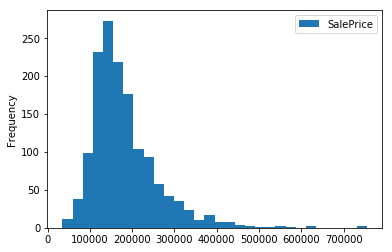

In [270]:
train_df.plot(x='LotArea', y='SalePrice',kind='hist', bins=30)

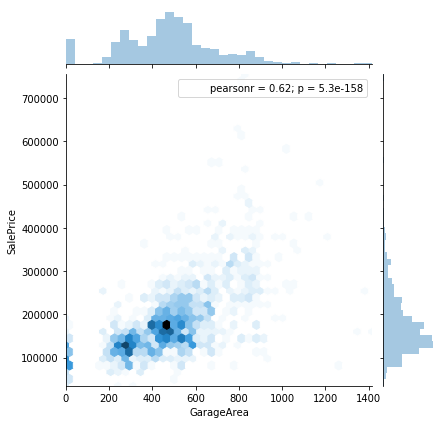

In [271]:
sns.jointplot(x='GarageArea', y='SalePrice',data=train_df,kind='hex')

In [272]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1)
#rf=RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [273]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [274]:
prediction=rf.predict(X_train)

In [275]:
print(mean_squared_error(y_train, prediction))

134861922.87069407


In [283]:
plt.scatter(y_train)

TypeError: scatter() missing 1 required positional argument: 'y'

In [284]:
from sklearn.linear_model import LinearRegression

In [285]:
lreg=LinearRegression()

In [286]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [287]:
predict = lreg.predict(X_train)

In [288]:
print(mean_squared_error(y_train, predict))

356744612.1249


In [ ]:
my_submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': prediction})

In [ ]:
my_submission.head()

In [ ]:
my_submission.to_csv('submission.csv', index=False)